In [1]:
import os

os.chdir("../..")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
# %#load_ext autoreload
# %#autoreload 2
# %#matplotlib inline

In [3]:
from collections import defaultdict

import tqdm.auto as tqdm

from modular_splicing.gtex_data.pipeline.splice_table import produce_splice_table


from modular_splicing.gtex_data.pipeline.gtex_data_table import (
    exon_junction_data,
    gene_expr_data,
)
from modular_splicing.gtex_data.pipeline.marginal_psis import *
from modular_splicing.gtex_data.experiments.tissue_groups import main_tissue_groups_v1

from modular_splicing.gtex_data.annotation.statistics import (
    compute_counts_by_type,
    compute_binned_counts,
    display_binned_counts,
    display_counts_by_type,
)

from modular_splicing.gtex_data.annotation.compute_psis_from_annotation import (
    compute_psis_all,
)

from working.junction_clustering import *

In [4]:
splice_table, name_to_ensg, frac_kept = produce_splice_table()
ensg_to_name = {v: k for k, v in name_to_ensg.items()}

In [5]:
tissue_groups = main_tissue_groups_v1

In [6]:
juncs = exon_junction_data()
genes = gene_expr_data()

In [7]:
cost_params = dict(annot_cost=1e-4, other_cost=0.1)

In [8]:
names, idxs = genes.group_tissue_ids(lambda x: x)
psis = compute_psis_all(
    sorted(name_to_ensg.values()), cost_params, idxs, ensembl_version=89
)

INFO:filelock:Lock 139843924302336 released on /scratch/kavig/.cache/permacache/modular_splicing/gtex_data/annotation/statistics/compute_psis_all_3/lock


In [9]:
gene_to_junc = defaultdict(list)
for g, e in zip(juncs.meta_1, juncs.meta_0):
    gene_to_junc[g].append(parse_junc(e))

In [10]:
gene_ensg = next(x for x, y in gene_to_junc.items() if 20 < len(y) < 40)

In [11]:
by_length = defaultdict(list)
for g in gene_to_junc:
    if g not in ensg_to_name:
        continue
    by_length[len(gene_to_junc[g])].append(g)

In [12]:
lengths_selected = sorted(by_length)[::10]

In [13]:
for l in lengths_selected:
    gene_ensg = by_length[l][0]
    name = ensg_to_name[gene_ensg]  # data.gene_by_id(gene_ensg.split(".")[0]).gene_name
    png_path = f"output-csvs/gtex_results/junction_annotations/{l:03d}_{name}.png"
    if os.path.exists(png_path):
        continue
    plot_example(
        genes,
        juncs,
        gene_ensg,
        name,
        png_path,
        cost_params=cost_params,
        psis=psis[gene_ensg]["scores_by_tissue"].mean(0),
    )

In [14]:
fn1_id = name_to_ensg["FN1"].split(".")[0]
[fn1_id] = [x for x in gene_to_junc if x.split(".")[0] == fn1_id]

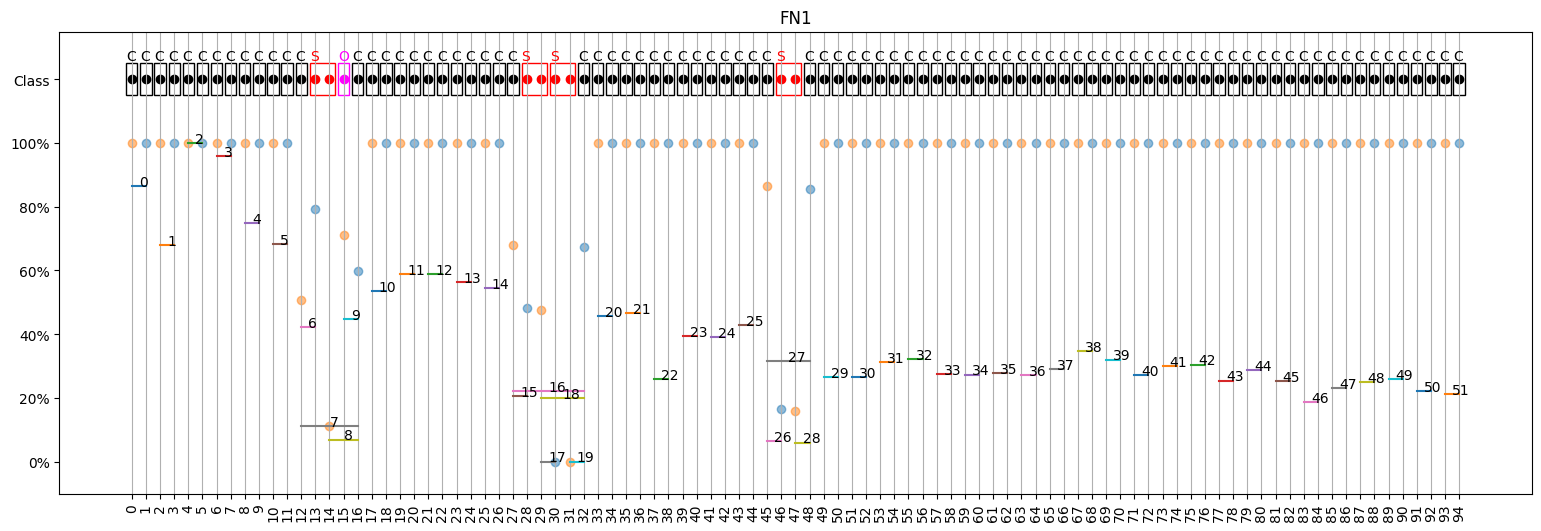

In [15]:
plot_example(genes, juncs, fn1_id, "FN1", png_path=None, cost_params=cost_params)

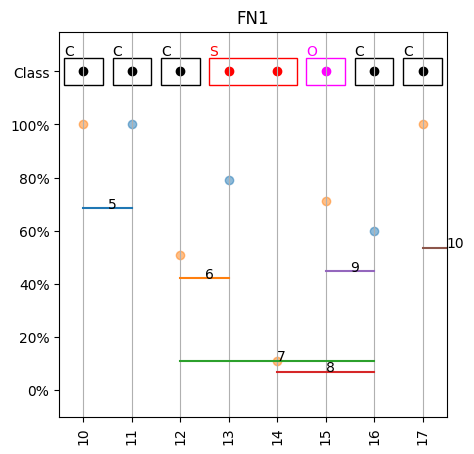

In [16]:
plot_example(
    genes,
    juncs,
    fn1_id,
    "FN1",
    png_path=None,
    cost_params=cost_params,
    xlim=(9.5, 17.5),
    size=(5, 5),
)

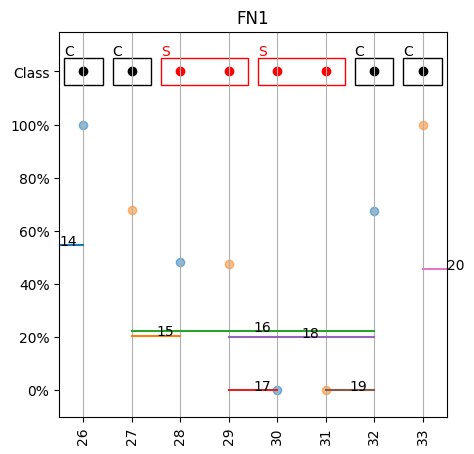

In [17]:
plot_example(
    genes,
    juncs,
    fn1_id,
    "FN1",
    png_path=None,
    cost_params=cost_params,
    xlim=(25.5, 33.5),
    size=(5, 5),
)

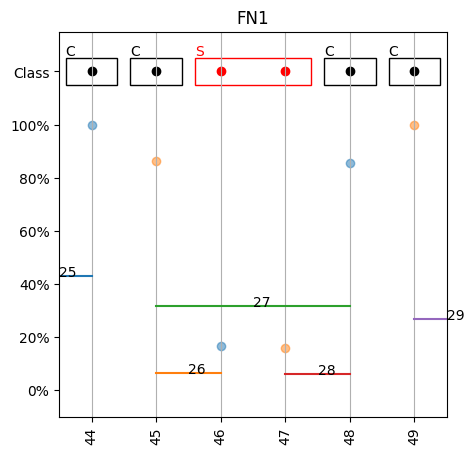

In [18]:
plot_example(
    genes,
    juncs,
    fn1_id,
    "FN1",
    png_path=None,
    cost_params=cost_params,
    xlim=(43.5, 49.5),
    size=(5, 5),
)

In [19]:
counts_each, by_length_class = compute_counts_by_type(
    sorted(name_to_ensg.values()), cost_params
)
counts_each, by_length_class = compute_binned_counts(counts_each, by_length_class)

INFO:filelock:Lock 139843924301232 acquired on /scratch/kavig/.cache/permacache/modular_splicing/gtex_data/annotation/statistics/compute_counts_by_type/lock
INFO:filelock:Lock 139843924301232 released on /scratch/kavig/.cache/permacache/modular_splicing/gtex_data/annotation/statistics/compute_counts_by_type/lock


In [20]:
from collections import defaultdict
import pandas as pd

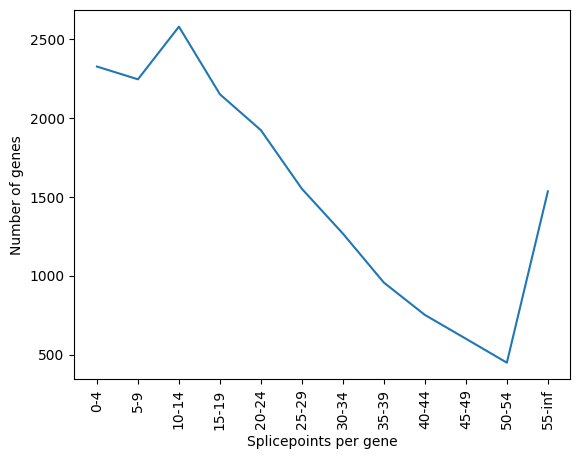

In [21]:
display_counts_by_type(counts_each)

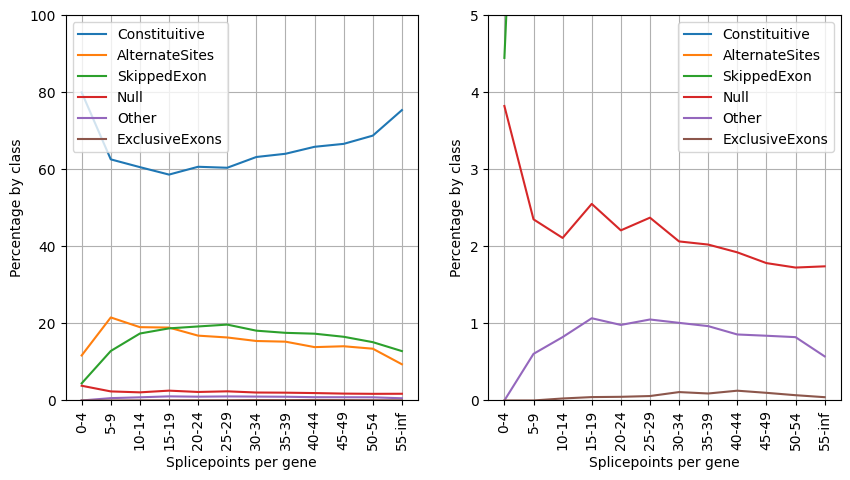

In [22]:
display_binned_counts(by_length_class)

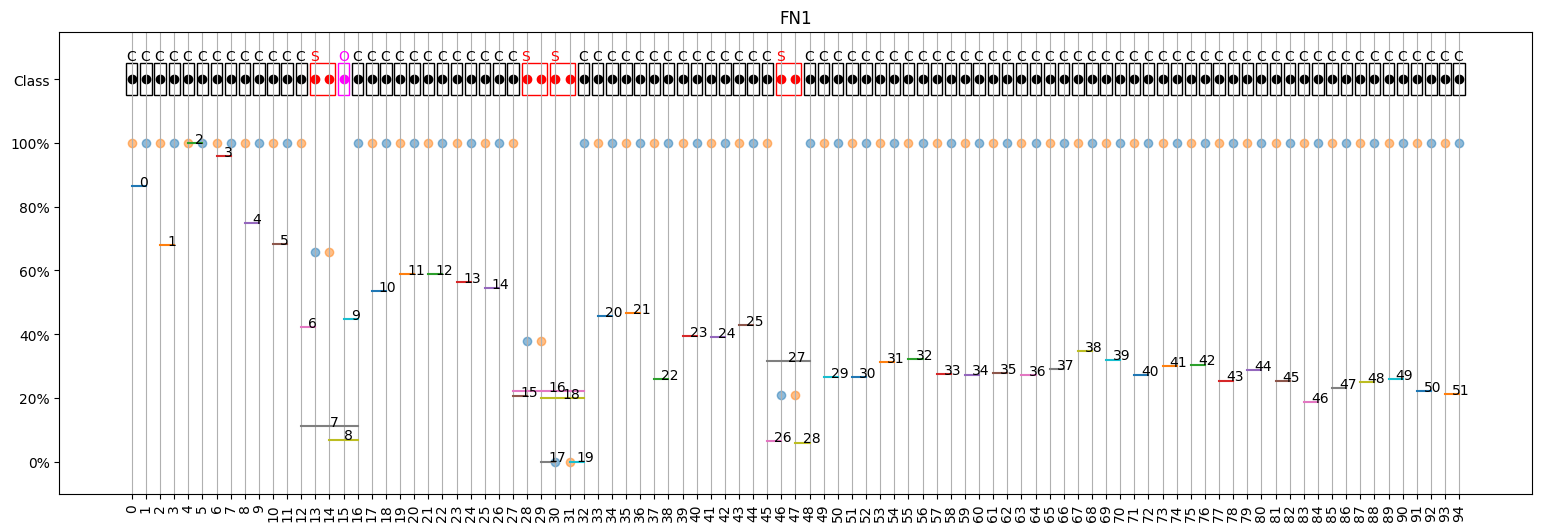

In [23]:
plot_example(
    genes,
    juncs,
    fn1_id,
    "FN1",
    png_path=None,
    cost_params=cost_params,
    psis=psis[name_to_ensg["FN1"]]["scores_by_tissue"].mean(0),
)